## **Intialization**


In [0]:
#Importing required libraries
import numpy as np
import pandas as pd

#Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Reading dataset
bikeRent = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0103/day.csv",
                       index_col=0)

In [0]:
#Get Dimensions of dataset
bikeRent.shape

(731, 15)

In [0]:
#Get first 5 rows 
bikeRent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
#Statistical analysis of data
bikeRent.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [0]:
#Get names of column of dataset
bikeRent.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## Data **Preparation**

In [0]:
#Create new dataset for Exploratory Data Analysis
data = bikeRent.copy()

#changing numeric to categorical and changing columns name to actual names
#data['Index'] = data['instant']
data['Date'] = data['dteday'].astype('category')
data['Season'] = data['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter']).astype('category')
data['Year'] = data['yr'].replace([0,1],['2011','2012']).astype('category')
data['Month'] = data['mnth'].astype('category')
data['Holiday'] = data['holiday'].replace([0,1],['Working day','Holiday']).astype('category')
data['Weekday'] = data['weekday'].astype('category')
data['Working Day'] = data['workingday'].replace([0,1],['Holiday','Working day']).astype('category')
data['Weather Condition'] = data['weathersit'].replace([1,2,3,4],['Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                                  'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                                  'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                                  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']).astype('category')

data['Temperature'] = (data['temp']*(39 + 8)) - 8
data['Feeling Temperature'] = (data['atemp']*(50 + 16)) - 16
data['Humidity'] = data['hum'] * 100
data['Wind Speed'] = data['windspeed'] * 67
data['Casual Users'] = data['casual']
data['Registered Users'] = data['registered']
data['Count'] = data['cnt']

data = data.drop(columns = bikeRent.columns)

## Exploratory data **analysis**

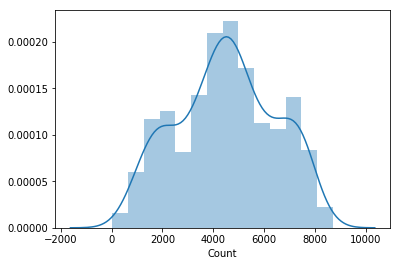

In [0]:
sns.distplot(data['Count'])

#Probability distribution of target variabel 'Count' can be seen as nearly normally distributed

In [0]:
#Separating colums by category
Categorical = ['Date','Season','Year','Month','Holiday','Weekday','Working Day','Weather Condition']
Continuous = ['Temperature','Feeling Temperature','Humidity','Wind Speed','Casual Users','Registered Users','Count']

Season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: Count, dtype: int64



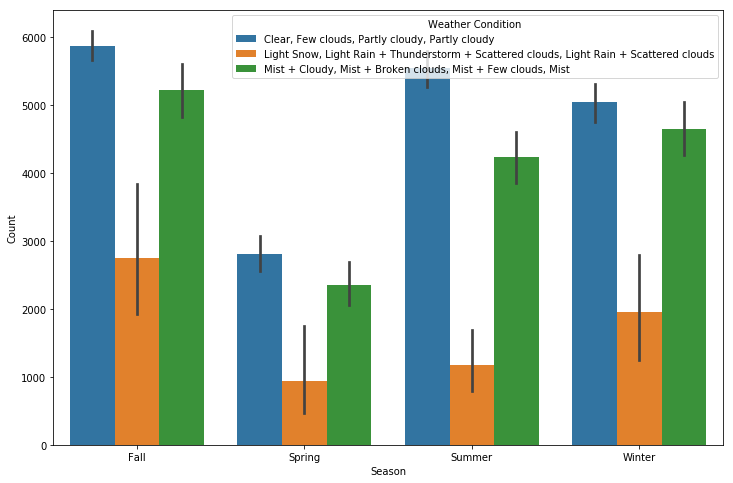

In [0]:
#distribution of categorical variables with target variable
print(data.groupby('Season')['Count'].sum())


print()
plt.gcf().set_size_inches(12,8)
sns.barplot(data=data,x='Season',y='Count',hue = 'Weather Condition')

#no. of bikes hired season wise, Fall is the season when most of the bikes got hired followed by summer
#most of bikes were hired when the weather was clear or partially cloudy
#and no weather situation occured with heavy rain and ice pallets

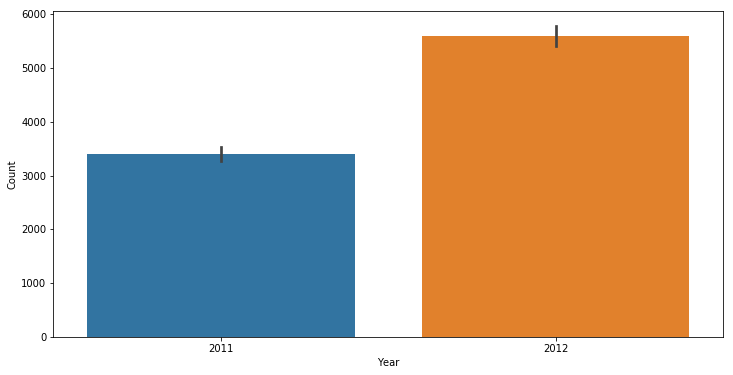

In [0]:
plt.gcf().set_size_inches(12,6)
sns.barplot(data=data,x='Year',y='Count')

#Year wise most of the bikes were hired in 2012, might be beacause of the popularity of the company

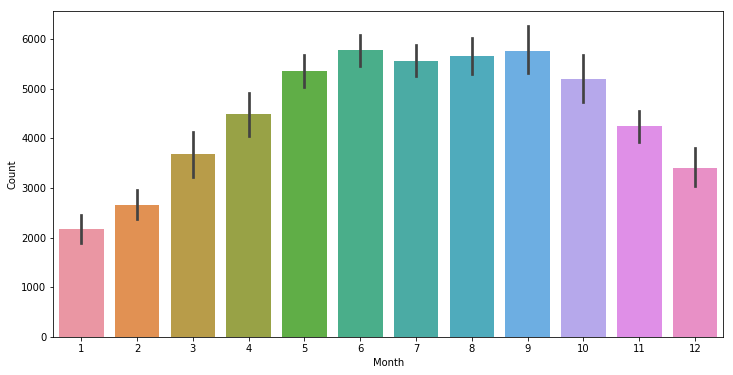

In [0]:
plt.gcf().set_size_inches(12,6)
sns.barplot(data=data,x='Month',y='Count')

#most of bikes were hired in months of June,July,August,September which are months of summer and fall

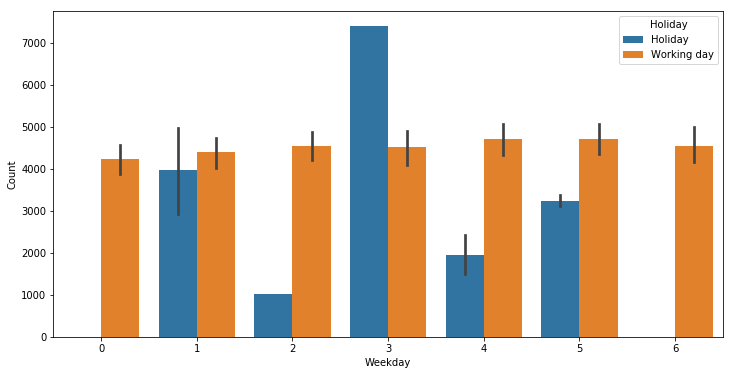

In [0]:
plt.gcf().set_size_inches(12,6)
sns.barplot(data=data,x='Weekday',y='Count',hue = 'Holiday')

#most of the bikes were hired on 3 day of week

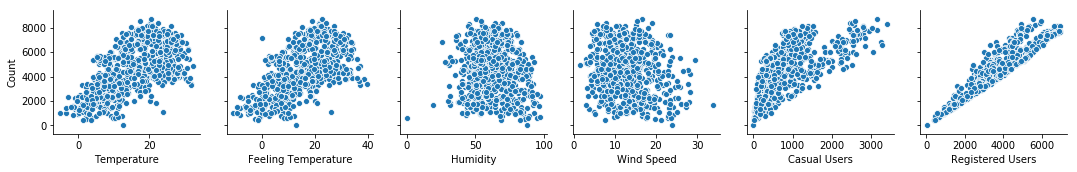

In [0]:
#Relation of continuous variable with target variable

sns.pairplot(data = data,
             x_vars = ['Temperature','Feeling Temperature','Humidity','Wind Speed','Casual Users','Registered Users'],
             y_vars = ['Count'])

#with the pair plot we can see the distribution of target variable 'Count' with the other continuous variables.
#the target variable is highly dependent on Registered users

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00e176be0>,
      dtype=object)

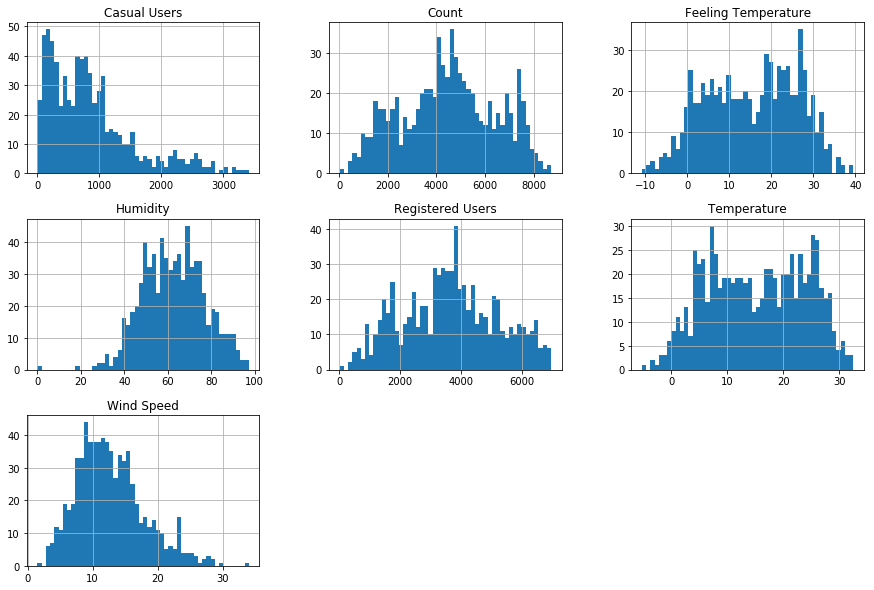

In [0]:
#Distribution of continuous variable
data[Continuous].hist(bins = 50,figsize = (15,10))


#From histogram distribution it can be seen that Casual users data is skewed to left because of outliers
#and nearly negligible dependency on 'Humidity'
#we need to remove 'Humidity' in feature selection afterwords

## Missing Value **Analysis**

In [0]:
#Missing value analyses
data.isnull().sum()

Date                   0
Season                 0
Year                   0
Month                  0
Holiday                0
Weekday                0
Working Day            0
Weather Condition      0
Temperature            0
Feeling Temperature    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Count                  0
dtype: int64

## **Outlier Detection**

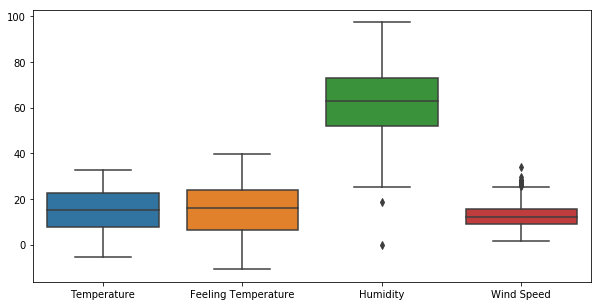

In [0]:
#Detection of outliers
var1 = ['Temperature','Feeling Temperature','Humidity','Wind Speed']

plt.gcf().set_size_inches(10,5)
sns.boxplot(data = data[var1])

#from boxplot the outliers can be seen in Humidity and Wind speed

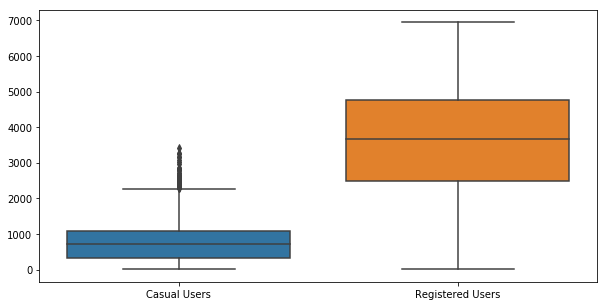

In [0]:
var2 = ['Casual Users','Registered Users']

plt.gcf().set_size_inches(10,5)
sns.boxplot(data = data[var2])

#here the outliers can be seen in Casual users

## Outlier **Removal**

In [0]:
#oulier removeal from Humidity
q75, q25 = np.percentile(data['Humidity'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

data = data.drop(data[data['Humidity'] < min].index)
data = data.drop(data[data['Humidity'] > max].index)

In [0]:
#outlier removal from windspeed
q75, q25 = np.percentile(data['Wind Speed'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

data = data.drop(data[data['Wind Speed'] < min].index)
data = data.drop(data[data['Wind Speed'] > max].index)

In [0]:
#outlier removal from casual users
q75, q25 = np.percentile(data['Casual Users'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

data = data.drop(data[data['Casual Users'] < min].index)
data = data.drop(data[data['Casual Users'] > max].index)

## Feature **Selection**

In [0]:
data[Continuous].corr().style.background_gradient(cmap='coolwarm')

,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Count
Temperature,1,0.991497,0.122406,-0.138183,0.585568,0.542106,0.625918
Feeling Temperature,0.991497,1,0.135352,-0.165645,0.584664,0.544994,0.628104
Humidity,0.122406,0.135352,1,-0.205273,-0.0888873,-0.112971,-0.120973
Wind Speed,-0.138183,-0.165645,-0.205273,1,-0.177481,-0.213087,-0.230985
Casual Users,0.585568,0.584664,-0.0888873,-0.177481,1,0.418987,0.64008
Registered Users,0.542106,0.544994,-0.112971,-0.213087,0.418987,1,0.965803
Count,0.625918,0.628104,-0.120973,-0.230985,0.64008,0.965803,1


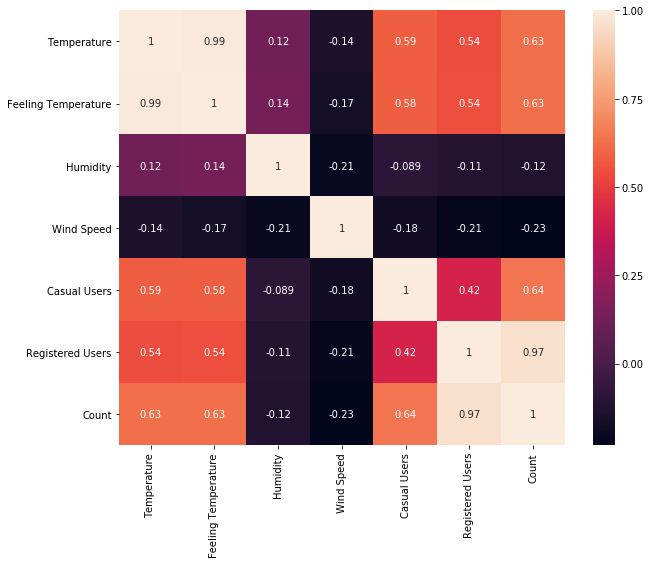

In [0]:
CorrMat = data[Continuous].corr()
plt.gcf().set_size_inches(10,8)
sns.heatmap(CorrMat,annot =True)

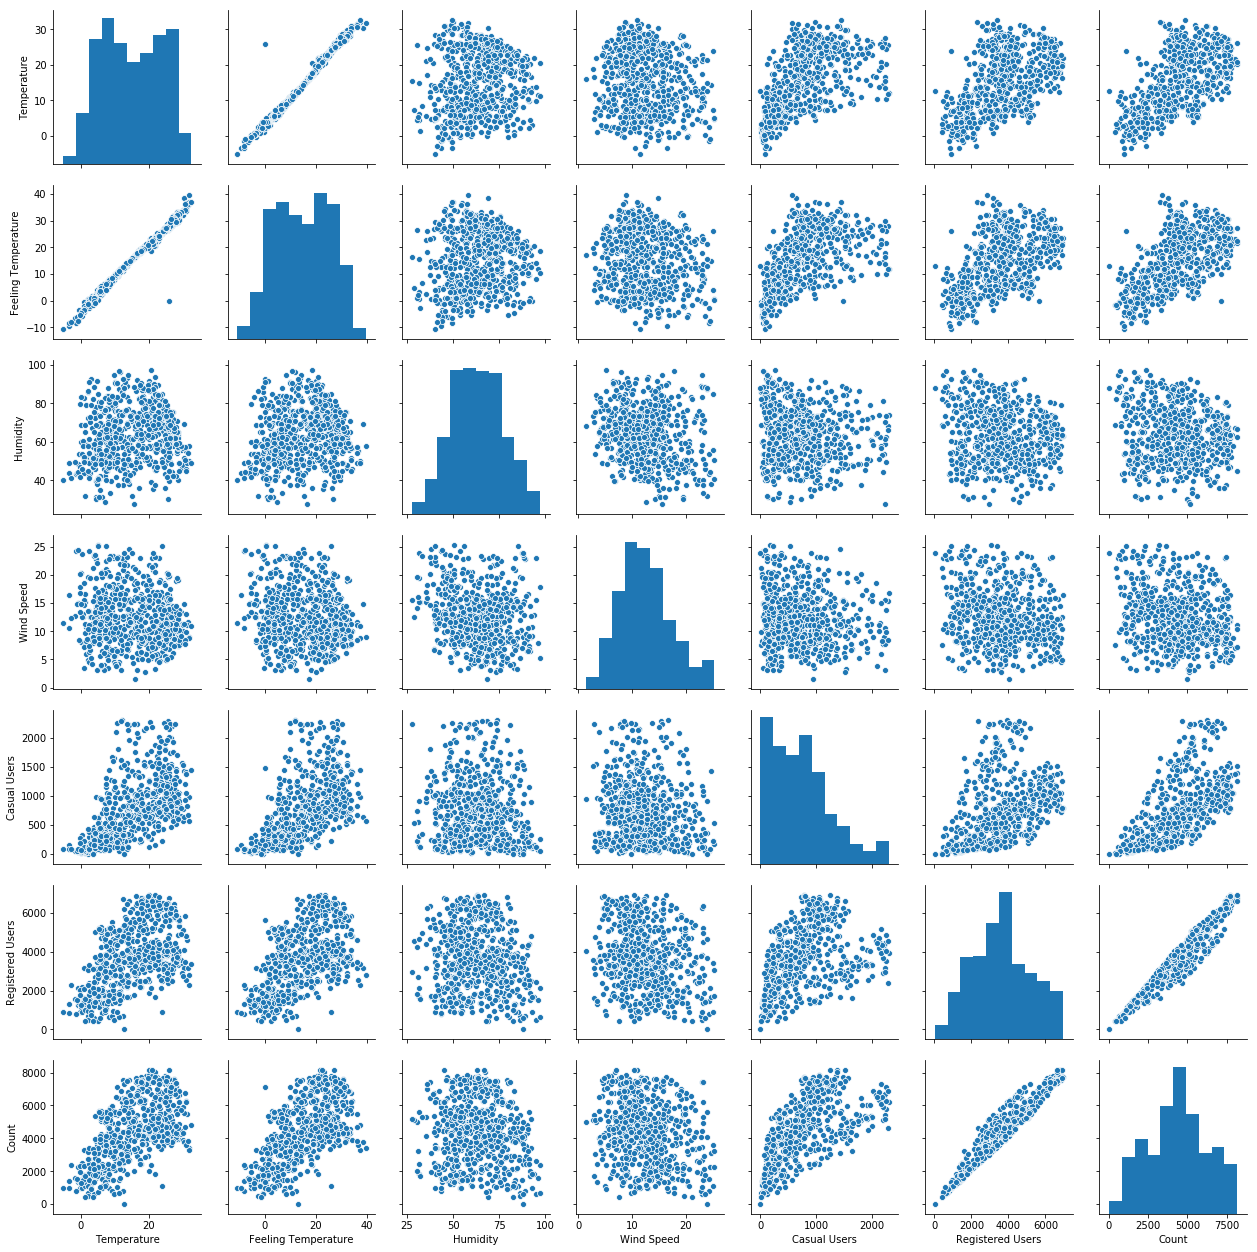

In [0]:
sns.pairplot(data[Continuous])

#From the above plots it can be seen that :
#Temerature and Feeling Temperature are highly correlated
#Registered Users is also highly corelated with target variable count
#So dropping two variables Feeling Temperature,Registered Users from the dataset

#after expermenting to prevent model overfitting Casual users also need to be dropped 

In [0]:
data = data.drop(columns=['Date','Feeling Temperature','Registered Users','Casual Users'])

In [0]:
data['Season'] = bikeRent['season']
data['Year'] = bikeRent['yr']
data['Month'] = bikeRent['mnth']
data['Holiday'] = bikeRent['holiday']
data['Weekday'] = bikeRent['weekday']
data['Working Day'] = bikeRent['workingday']
data['Weather Condition'] = bikeRent['weathersit']

#Changing categorical to numerical for modelling input

## **Sampling**

In [0]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(data.iloc[:,:10],data.iloc[:,10] ,test_size = 0.2)

#Spliting dataset into train and test sets with ratio of 20 percent

## **Modelling**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

models = []
models.append(('LR ',LinearRegression()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR',RandomForestRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('LSO',Lasso()))

#Using 5 regression algorithms to check which algorithm is best for this dataset

In [0]:
from sklearn.model_selection import KFold,cross_val_score

def ModellingAndEvaluationWithCrossValidation(models,scoring):
    for name,model in models:
        kfold = KFold(n_splits=10, random_state=0)
        Scores =  cross_val_score(model,xTrain,yTrain,scoring=scoring, cv=kfold)
        Scores = np.sqrt(-Scores)
        print(name ,' : ' ,Scores.mean())

def ModellingAndEvaluation(models,scoring):
    for name,model in models:
        model.fit(xTrain,yTrain)
        predict = model.predict(xTest)
        print(name ,' : ' ,scoring(yTest,predict))
        
#Created functions to check the model with cross validation and test set

## **Evaluation**

### Mean Absolute Error

**Mean absolute error scores with Cross validation:-**<br>
LR   :  24.756516372481055<br>
DTR  :  24.42818446609717<br>
RFR  :  21.72871879994421<br>
KNN  :  31.88993961677325<br>
LSO  :  24.74685025048984<br>

**Mean absolute error scores with test set:-**<br>
LR   :  673.0230994298247<br>
DTR  :  667.4705882352941<br>
RFR  :  515.1220588235293<br>
KNN  :  1093.6750000000002<br>
LSO  :  671.4968494943123<br>

In [0]:
from sklearn.metrics import mean_absolute_error

print("MAE scores with Cross validation:-")
ModellingAndEvaluationWithCrossValidation(models,'neg_mean_absolute_error')

print()
print("MAE scores with test set:-")
ModellingAndEvaluation(models,mean_absolute_error)

#Mean absolute error score
#Here we can see the error value of Linear Regression is way less than the other algorithms

MAE scores with Cross validation:-
LR   :  24.88595422932027
DTR  :  24.92410039320377


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RFR  :  22.029953676073795
KNN  :  32.390647510814986
LSO  :  24.87689900008971

MAE scores with test set:-
LR   :  655.5787398489072
DTR  :  663.1102941176471
RFR  :  488.2286764705882
KNN  :  1025.9220588235296
LSO  :  654.5805599239699


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Mean squared error

**Mean squared error scores with Cross validation:-**<br>
LR   :  818.0101656656103<br>
DTR  :  867.841221570945<br>
RFR  :  667.7082018846622<br>
KNN  :  1218.8729421997991<br>
LSO  :  818.1679241703506<br>

**Mean squared error scores with test set:-**<br>
LR   :  778193.4448160154<br>
DTR  :  875236.8014705882<br>
RFR  :  557750.5021323529<br>
KNN  :  1745766.0673529413<br>
LSO  :  775718.2731361163<br>

In [0]:
from sklearn.metrics import mean_squared_error

print("MSE scores with Cross validation:-")
ModellingAndEvaluationWithCrossValidation(models,'neg_mean_squared_error')

print()
print("MSE scores with test set:-")
ModellingAndEvaluation(models,mean_squared_error)

#Mean Squraed error
#Tried and tested with different ratio of train and test set

#From Above scores we can see that Linear Regression algorithm is the best fit for the Bike Rental count prediction

MSE scores with Cross validation:-
LR   :  831.2166475018772
DTR  :  966.6700808653868
RFR  :  685.5275631345462
KNN  :  1256.828826770424
LSO  :  831.175859195946

MSE scores with test set:-
LR   :  726930.8007781799
DTR  :  872696.2867647059
RFR  :  490667.7257352941
KNN  :  1513440.6185294117
LSO  :  726111.6942676706


### Mean absolute percentage error

MAPE scores:-<br>
LR   :  22.059973855505874<br>
DTR  :  23.094885769820984<br>
RFR  :  20.002969760733535<br>
KNN  :  38.408839925256736<br>
LSO  :  21.95474677633306<br>

In [0]:
def MAPE(actual,predicted):
    return np.mean((abs(actual-predicted))/actual)*100

print("MAPE scores with test set:-")
ModellingAndEvaluation(models,MAPE)

MAPE scores with test set:-
LR   :  18.914622467959102
DTR  :  19.266057365096454
RFR  :  15.727827008778728
KNN  :  31.57247156756035
LSO  :  18.891950386725913


### R Squared Value

R squared scores with test set:-<br>
LR   :  0.7676618700429276<br>
DTR  :  0.7376962999703129<br>
RFR  :  0.8253477229781967<br>
KNN  :  0.4787825236343506<br>
LSO  :  0.7684008595104712<br>

In [0]:
from sklearn.metrics import r2_score

print("R squared scores with test set:-")
ModellingAndEvaluation(models,r2_score)

R squared scores with test set:-
LR   :  0.7837905229922718
DTR  :  0.7835818640163181
RFR  :  0.866157827738562
KNN  :  0.5498605860912656
LSO  :  0.7840341480939476


## **RandomForest Regressor is the best fit for this dataset**
MAE =  517.997794117647<br>
MSE =  586829.5627205883<br>
MAPE=  19.953862964031906<br>
R2  =  0.8247956416052016<br>


In [0]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RFR = RandomForestRegressor()
RFR.fit(xTrain,yTrain)
predict = RFR.predict(xTest)

MAE = mean_absolute_error(yTest,predict)
MSE = mean_squared_error(yTest,predict)
MAPE = MAPE(yTest,predict)
R2 = r2_score(yTest,predict)

print('MAE = ',MAE)
print('MSE = ',MSE)
print('MAPE= ',MAPE)
print('R2  = ',R2)

#Aplied Random Forest regression to model and calculated MAE,MSE,MAPE and RSquared value

MAE =  481.5845588235293
MSE =  445648.1147794117
MAPE=  15.520805776412965
R2  =  0.8674518321100299


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
